In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [14]:
e = nx.read_pajek("egypt_retweets.net")

# sub graph and ego network

In [15]:
len(e)

25178

In [16]:
componet_subgraph = list(nx.connected_component_subgraphs(e))

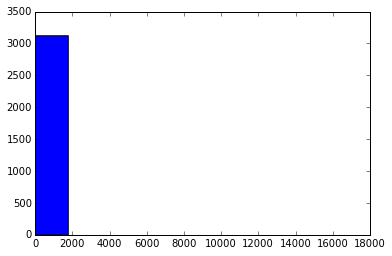

In [17]:
h = plt.hist([len(c) for c in componet_subgraph])

In [18]:
s = pd.DataFrame([len(c) for c in componet_subgraph],columns=['length'])
s.describe()

,length
count,3122.000000
mean,8.064702
std,317.850059
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,17762.000000


In [19]:
s.groupby(['length']).length.count()

length
1          42
2        2429
3         428
4         118
5          41
6          26
7           7
8           7
9          11
10          5
11          2
13          1
14          1
16          2
64          1
17762       1
Name: length, dtype: int64

In [20]:
#d = {}
#for length in h:
#    if length in d:
#        d[length] += 1
#    else:
#        d[length] = 1

In [21]:
s[pd.notnull(s.where(s > 10)['length'])]

,length
1,17762
7,16
24,64
388,11
410,14
584,13
1087,11
1404,16


In [65]:
def trim_edges(graph, weight=1):
    g = nx.Graph()
    for frm, to, edata in graph.edges(data=True):
        if edata['weight'] > weight:
            g.add_edge(frm, to, edata)
    return g

def island_method(g, iterrations=5):
    weights = [edata['weight'] for frm, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterrations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]


In [75]:
c = list(nx.connected_component_subgraphs(e))[1]
c

In [71]:
cc = list(nx.connected_component_subgraphs(e))[0]

In [76]:
island = island_method(c)
island

[[1, <networkx.classes.graph.Graph at 0x10f0c89b0>],
 [62, <networkx.classes.graph.Graph at 0x10b928240>],
 [123, <networkx.classes.graph.Graph at 0x10c803438>],
 [184, <networkx.classes.graph.Graph at 0x10c5f6cf8>],
 [245, <networkx.classes.graph.Graph at 0x10c28e160>]]

In [77]:
for w, graph in island:
    print(w, len(graph), len(list(nx.connected_component_subgraphs(graph))))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [79]:
justin = nx.Graph(nx.ego_graph(c, 'justinbieber', radius=2))

In [80]:
nx.average_clustering(justin)

0.12727272727272726

In [82]:
ghonim = nx.Graph(nx.ego_graph(c, 'Ghonim', radius=2))

In [83]:
len(ghonim)

3450

In [84]:
nx.average_clustering(ghonim)

0.043322544756993125

In [85]:
pos_ghonim=nx.spring_layout(ghonim)

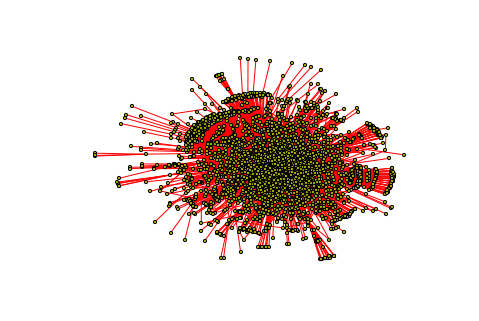

In [86]:
nx.draw(ghonim, pos=pos_ghonim, node_color='y',
        node_size=10,
        edge_color='r')

In [87]:
pos_justin = nx.spring_layout(justin)

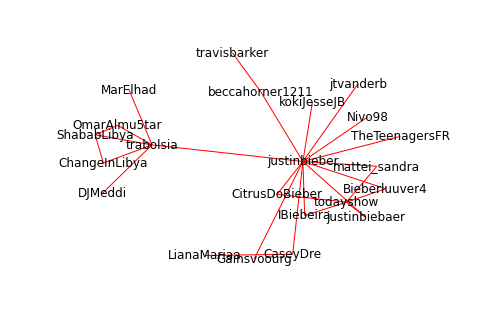

In [88]:
nx.draw(justin, pos=pos_justin, 
        node_size=0,
        with_labels=True,
        edge_color='r', )

In [89]:
nx.average_clustering(ghonim) #cluster coefficient 

0.043322544756993125

# Triad

In [29]:
import csv
edgelist = csv.reader(open('9_11_edgelist.txt'))
g = nx.Graph()
for frm, to, weight, conf in edgelist:
    g.add_edge(frm, to, weight=weight, conf=conf)

In [30]:
for n in g.nodes_iter():
    g.node[n]['flight'] = 'None'

In [31]:
attrb = csv.reader(open('9_11_attrib.txt'))
for name, attr in attrb:
    g.node[name]['flight'] = attr

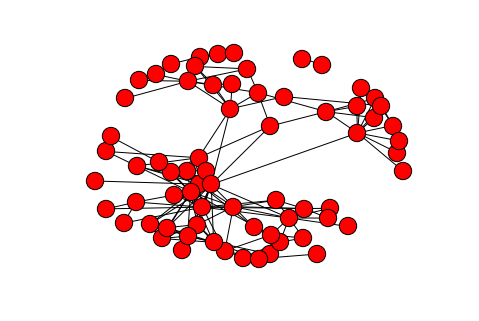

In [32]:
nx.draw(g)

In [33]:
component = nx.connected_component_subgraphs(g)


In [34]:
cc = next(component)

In [35]:
from collections import defaultdict

In [36]:
def plot_multimode(m, layout=nx.spring_layout,
                   type_string='type',
                   filename_prefix='',
                   output_type='pdf'):
    colors = ['r', 'g', 'b', 'c', 'm','y','k']
    colormap = {}
    d = nx.degree(m)
    pos = layout(m)
    nodesets = defaultdict(list)
    for n in m.nodes_iter():
        t = m.node[n][type_string]
        nodesets[t].append(n)
    print("drawing nodes..")
    i = 0
    for key in nodesets.keys():
        ns = [d[n]*100 for n in nodesets[key]]
        nx.draw_networkx_nodes(m, pos, 
                               nodelist=nodesets[key],node_size=ns)
        colormap[key] = colors[i]
        i += 1
        if i == len(colors):
            i = 0
    print("drawing edges...")
    nx.draw_networkx_edges(m, pos, width=0.5,alpha=0.5)
    nx.draw_networkx_labels(m, pos, font_size=8)
    plt.axis('off')
    if filename_prefix is not '':
        plt.savefig(filename_prefix+'.'+output_type)


        

In [37]:
import multimode as mm

drawing nodes...
{'None': 'r'}
drawing edges...
drawing labels...


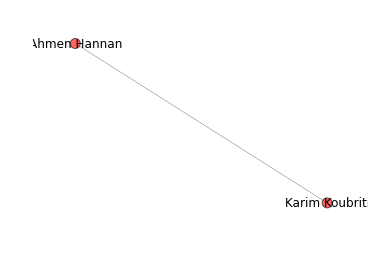

In [38]:
mm.plot_multimode(cc, type_string='flight',filename_prefix='example')

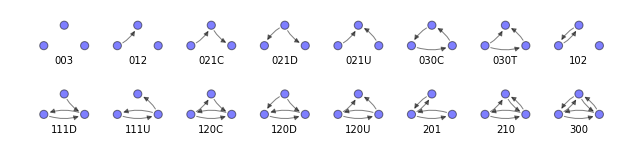

In [39]:
import triadic
import draw_triads

In [40]:
kite = nx.DiGraph(nx.krackhardt_kite_graph())

In [41]:
k_census, k_node_census = triadic.triadic_census(kite)
k_census

{'003': 22.0,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 63,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 24,
 '210': 0,
 '300': 11}

In [42]:
census, node_census = triadic.triadic_census(g)

In [43]:
census

{'003': 42716.0,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 8837,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 707,
 '210': 0,
 '300': 134}

In [44]:
node_census

{'Abdelghani Mzoudi': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 0,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 0,
  '210': 0,
  '300': 0},
 'Abdul Aziz Al-Omari': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 59,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 0,
  '210': 0,
  '300': 0},
 'Abdussattar Shaikh': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 119,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 6,
  '210': 0,
  '300': 1},
 'Abu Qatada': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 297,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 14,
  '210': 0,
  '300': 3},
 'Abu Walid': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,


In [45]:
keys = list(k_node_census.values())[1].keys()

In [46]:
values = [v for v in 
          [k_node_census[k].values()
           for k in k_node_census.keys()]]

In [47]:
pd.DataFrame(values, columns=sorted(keys))

,003,012,021C,021D,021U,030C,030T,102,111D,111U,120C,120D,120U,201,210,300
0,0,0,0,0,0,0,8,0,4,0,14,0,0,0,0,0
1,0,0,0,0,0,0,4,0,3,0,11,0,0,0,0,0
2,0,0,0,0,0,0,4,0,1,0,7,0,0,0,0,0
3,0,0,0,0,0,0,3,0,2,0,7,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,4,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,5,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
g_values = [v for v in 
          [node_census[k].values()
           for k in node_census.keys()]]

In [49]:
pd.DataFrame(g_values, columns=sorted(keys))

,003,012,021C,021D,021U,030C,030T,102,111D,111U,120C,120D,120U,201,210,300
0,0,0,0,0,0,0,0,0,0,0,67,0,0,0,0,0
1,0,0,0,0,0,0,41,0,2,0,219,0,0,0,0,0
2,0,0,0,0,0,0,6,0,0,0,45,0,0,0,0,0
3,0,0,0,0,0,0,57,0,20,0,479,0,0,0,0,0
4,0,0,0,0,0,0,7,0,0,0,60,0,0,0,0,0
5,0,0,0,0,0,0,2,0,1,0,195,0,0,0,0,0
6,0,0,0,0,0,0,12,0,1,0,119,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,52,0,14,0,489,0,0,0,0,0
9,0,0,0,0,0,0,11,0,1,0,121,0,0,0,0,0


In [50]:
census, node_census = triadic.triadic_census(cc)

In [51]:
pd.DataFrame([[k,v]for k,v in 
 sorted([ (node_census[k]['300'],k) for k in node_census.keys()], reverse=True)])

,0,1
0,0,Karim Koubriti
1,0,Ahmen Hannan


In [52]:
eco = nx.read_pajek('economic.net')

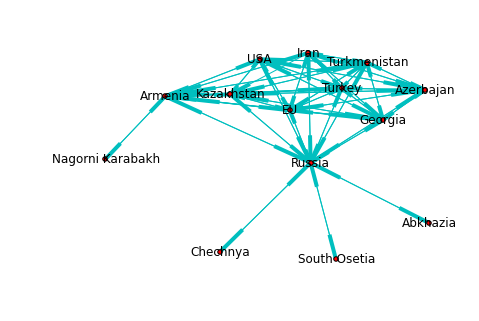

In [53]:
nx.draw(eco, node_size=20, edge_color='c', with_labels=1)

In [54]:
eco.edges(data=1)[:5]

[('Azerbajan', 'EU', {'weight': 0.75}),
 ('Azerbajan', 'Turkey', {'weight': 0.5}),
 ('Azerbajan', 'USA', {'weight': 0.5}),
 ('Azerbajan', 'Turkmenistan', {'weight': 0.5}),
 ('Azerbajan', 'Kazakhstan', {'weight': 0.25})]

In [55]:
e2 = trim_edges(eco, weight=0.5)

In [56]:
cliques = list(nx.find_cliques(e2))
cliques

[['Chechnya', 'Russia'],
 ['EU', 'Armenia'],
 ['EU', 'Turkey', 'Russia'],
 ['EU', 'Turkey', 'USA'],
 ['EU', 'Kazakhstan', 'Russia'],
 ['EU', 'Kazakhstan', 'USA'],
 ['EU', 'Georgia'],
 ['EU', 'Azerbajan'],
 ['Nagorni Karabakh', 'Armenia'],
 ['Abkhazia', 'Russia'],
 ['South Osetia', 'Russia']]

In [90]:
import hc

In [92]:
clusters = hc.create_hc(eco)
clusters

[['Armenia', 'Nagorni Karabakh', 'Kazakhstan'],
 ['Azerbajan',
  'EU',
  'Turkey',
  'South Osetia',
  'Iran',
  'Turkmenistan',
  'Chechnya',
  'Abkhazia',
  'Russia',
  'Georgia',
  'USA']]

In [93]:
M = nx.blockmodel(eco, clusters)

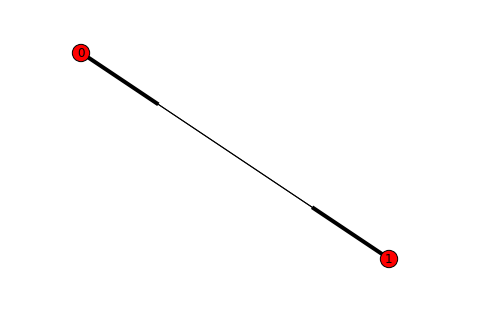

In [95]:
nx.draw(M, pos=nx.spring_layout(M),with_labels=True)

In [1]:
# P163
# “トライアド、ネットワークの密度、対立